# Author: Mostafa Rezapour
# Department of Mathematics and Statistics 
# Wake Forest University, Winston-Salem, NC, U.S.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot



# Section 1. Analyzing the Education and COVID data

In [8]:
dat_set = pd.read_csv("Education and COVID.csv", encoding= 'unicode_escape')


In [9]:
#the total number of missing values 
print(dat_set.isnull().values.sum())

0


In [10]:
dat_set.shape

(72, 8)

In [11]:
pd.set_option("display.max_columns", None)
dat_set.head(5)

,Data as of,Start Date,End Date,Education,Race,COVID-19 Deaths,Total Deaths,CTDPercentage
0,2/1/2021,1/1/2020,1/30/2021,8th grade or less,Hispanic,29157,106285,27.432846
1,2/1/2021,1/1/2020,1/30/2021,8th grade or less,Non-Hispanic American Indian or Alaska Native,706,3085,22.884927
2,2/1/2021,1/1/2020,1/30/2021,8th grade or less,Non-Hispanic Asian,2610,16283,16.028987
3,2/1/2021,1/1/2020,1/30/2021,8th grade or less,Non-Hispanic Black,5699,41437,13.753409
4,2/1/2021,1/1/2020,1/30/2021,8th grade or less,Non-Hispanic More than one race,103,1676,6.145585


In [12]:
dat_set.columns

Index(['Data as of', 'Start Date', 'End Date', 'Education', 'Race',
       'COVID-19 Deaths', 'Total Deaths', 'CTDPercentage'],
      dtype='object')

In [13]:
dat_set2=dat_set.drop(['Data as of', 'Start Date', 'End Date','COVID-19 Deaths', 'Total Deaths'], axis=1)
dat_set2

,Education,Race,CTDPercentage
0,8th grade or less,Hispanic,27.432846
1,8th grade or less,Non-Hispanic American Indian or Alaska Native,22.884927
2,8th grade or less,Non-Hispanic Asian,16.028987
3,8th grade or less,Non-Hispanic Black,13.753409
4,8th grade or less,Non-Hispanic More than one race,6.145585
...,...,...,...
67,Unknown,Non-Hispanic Black,16.304748
68,Unknown,Non-Hispanic More than one race,11.764706
69,Unknown,Non-Hispanic Native Hawaiian or Other Pacific ...,25.242718
70,Unknown,Non-Hispanic White,11.871009


In [14]:
dat_set2.columns

Index(['Education', 'Race', 'CTDPercentage'], dtype='object')

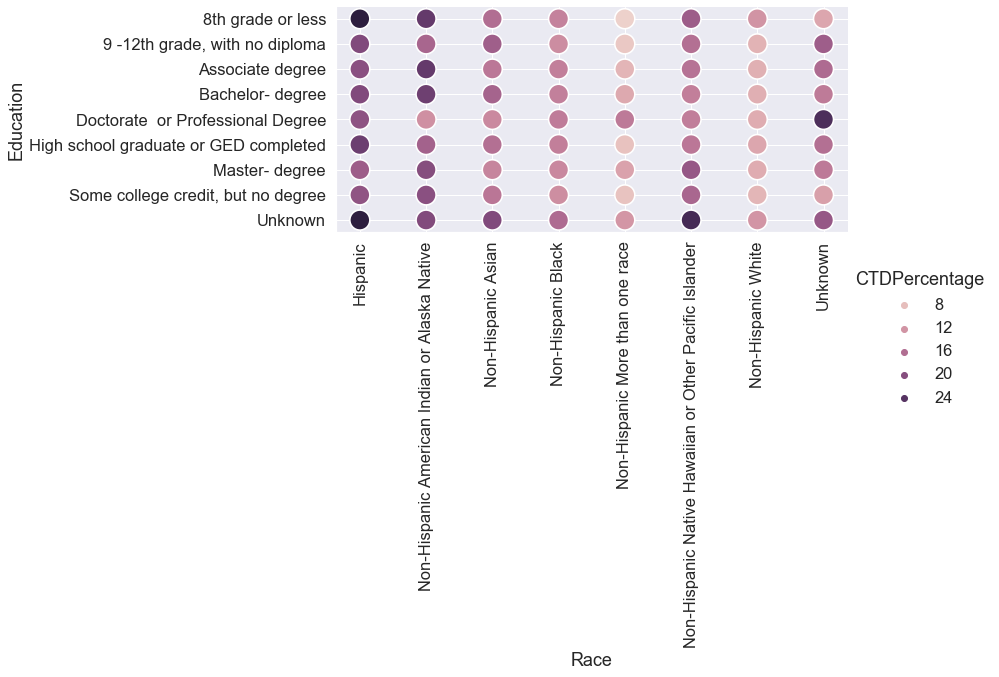

In [15]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set(style="white") #change style
sns.set_palette('viridis')
import os
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
sns.set(font_scale=1.5)
## Pairplots: Clicks by Sales, Sales Amount in USD 
sns.relplot(x="Race" , y="Education",  ci="sd", hue='CTDPercentage',data=dat_set2,height=4,aspect=25/8, s=400)
plt.xticks(rotation=90)
plt.show()



In [16]:
dat_set2.columns

Index(['Education', 'Race', 'CTDPercentage'], dtype='object')

In [17]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats

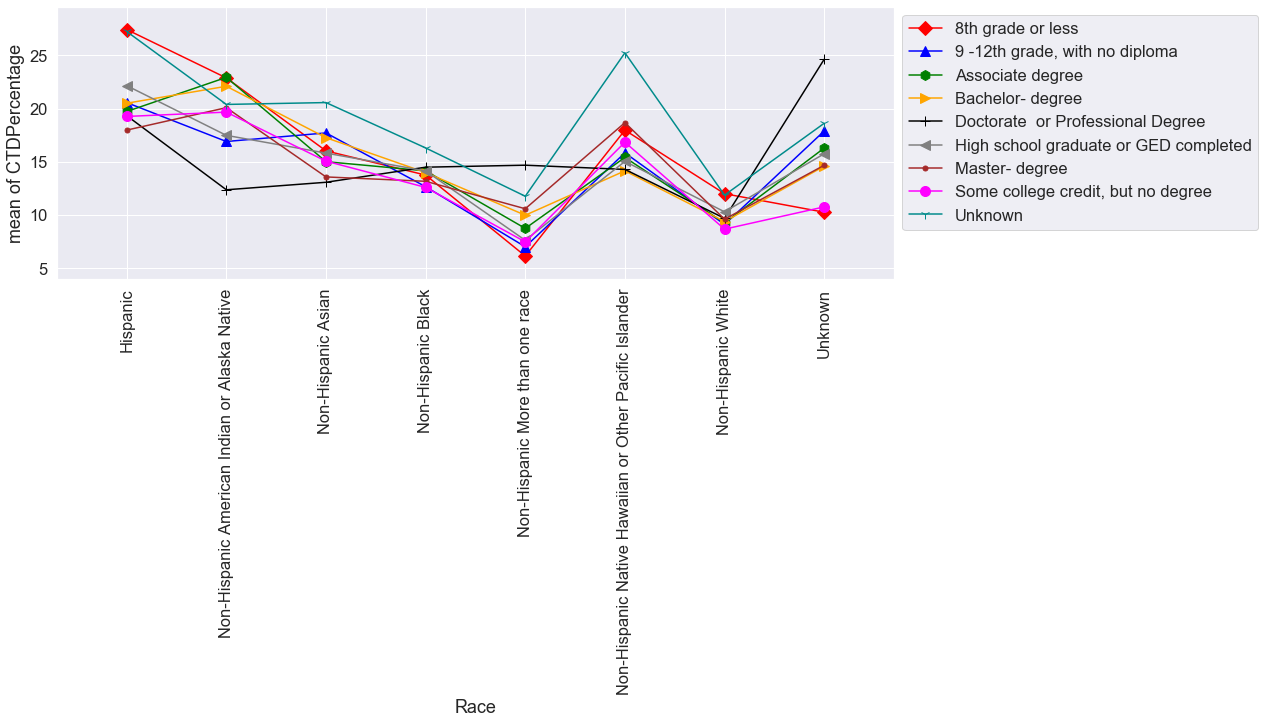

In [18]:
data=dat_set2
fig, ax = plt.subplots(figsize=(15, 5))
fig = interaction_plot(data.Race, data.Education, data.CTDPercentage,
             colors=['red','blue','green','orange','black','grey','brown','fuchsia','darkcyan'], markers=['D','^','h','>','+','<','.','o','1'], ms=10,ax=ax)
plt.xticks(rotation = 90) 
ax.legend(bbox_to_anchor=(1, 1))


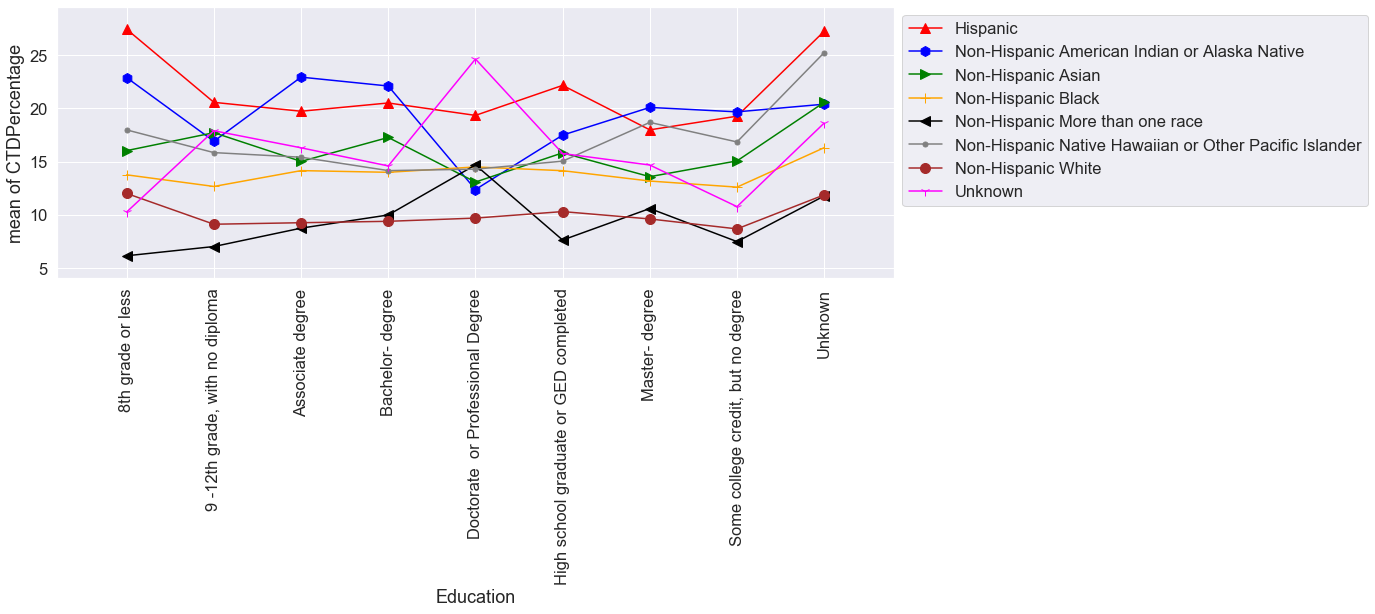

In [19]:
data=dat_set2
fig, ax = plt.subplots(figsize=(15, 5))
fig = interaction_plot(data.Education, data.Race, data.CTDPercentage,
             colors=['red','blue','green','orange','black','grey','brown','fuchsia'], markers=['^','h','>','+','<','.','o','1'], ms=10,ax=ax)
plt.xticks(rotation = 90) 
ax.legend(bbox_to_anchor=(1, 1))


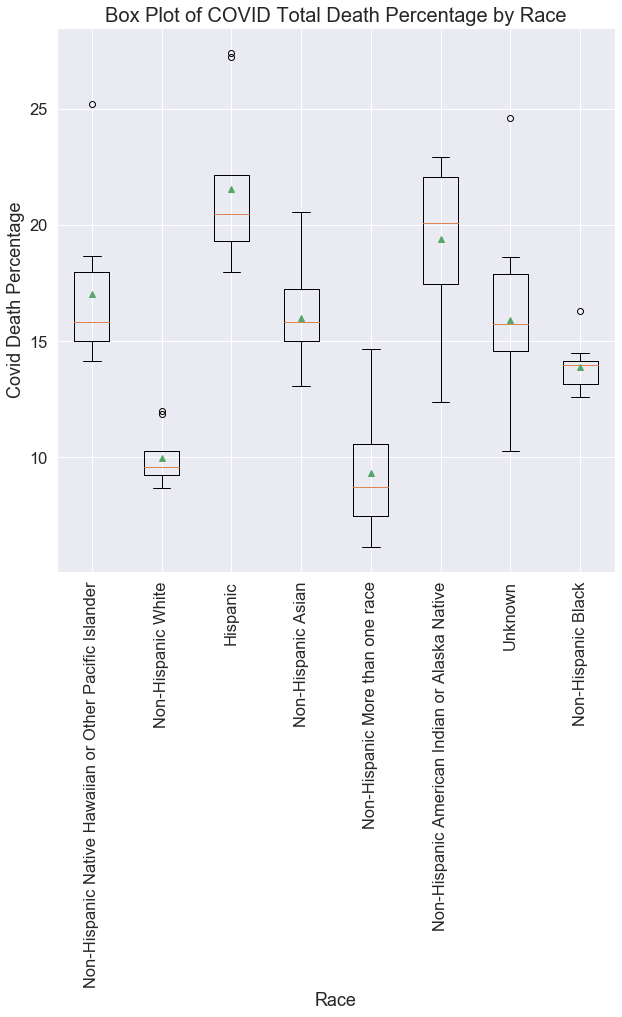

In [20]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of COVID Total Death Percentage by Race", fontsize= 20)
ax.set

data = [dat_set2['CTDPercentage'][dat_set2['Race'] == 'Non-Hispanic Native Hawaiian or Other Pacific Islander'],
        dat_set2['CTDPercentage'][dat_set2['Race'] == 'Non-Hispanic White'],
        dat_set2['CTDPercentage'][dat_set2['Race'] == 'Hispanic'],
        dat_set2['CTDPercentage'][dat_set2['Race'] == 'Non-Hispanic Asian'],
        dat_set2['CTDPercentage'][dat_set2['Race'] == 'Non-Hispanic More than one race'],
        dat_set2['CTDPercentage'][dat_set2['Race'] == 'Non-Hispanic American Indian or Alaska Native'],
        dat_set2['CTDPercentage'][dat_set2['Race'] == 'Unknown'],
        dat_set2['CTDPercentage'][dat_set2['Race'] == 'Non-Hispanic Black']]

ax.boxplot(data,
           labels= ['Non-Hispanic Native Hawaiian or Other Pacific Islander', 'Non-Hispanic White', 'Hispanic','Non-Hispanic Asian','Non-Hispanic More than one race','Non-Hispanic American Indian or Alaska Native', 'Unknown','Non-Hispanic Black'],
           showmeans= True)

plt.xlabel("Race")
plt.ylabel("Covid Death Percentage")
plt.xticks(rotation = 90) 

plt.show()

In [21]:
dat_set2['Education'].value_counts()

9 -12th grade, with no diploma           8
Unknown                                  8
Master- degree                           8
Bachelor- degree                         8
Associate degree                         8
High school graduate or GED completed    8
Doctorate  or Professional Degree        8
Some college credit, but no degree       8
8th grade or less                        8
Name: Education, dtype: int64

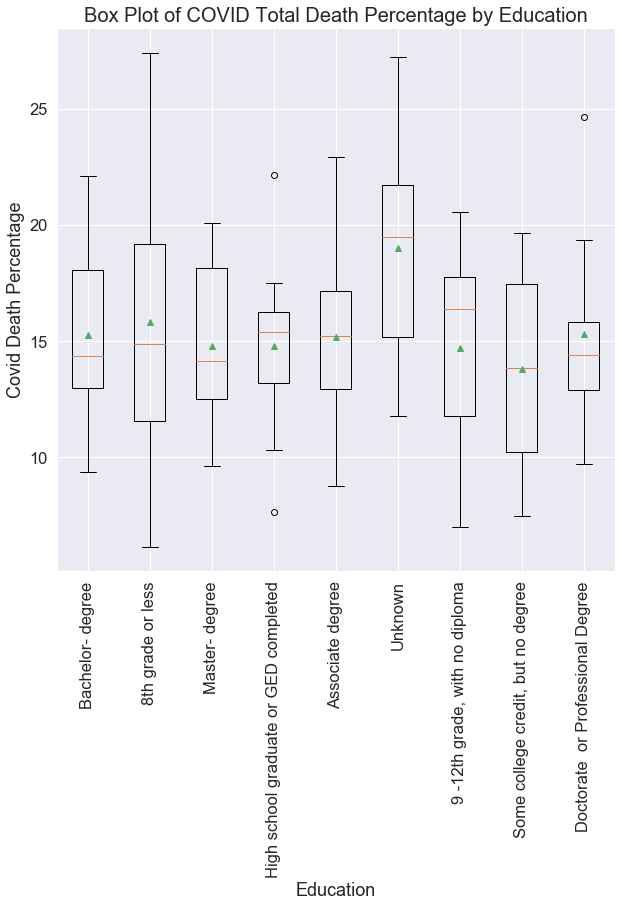

In [22]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of COVID Total Death Percentage by Education", fontsize= 20)
ax.set

data = [dat_set2['CTDPercentage'][dat_set2['Education'] == 'Bachelor- degree'],
        dat_set2['CTDPercentage'][dat_set2['Education'] == '8th grade or less'],
        dat_set2['CTDPercentage'][dat_set2['Education'] == 'Master- degree'],
        dat_set2['CTDPercentage'][dat_set2['Education'] == 'High school graduate or GED completed'],
        dat_set2['CTDPercentage'][dat_set2['Education'] == 'Associate degree'],
        dat_set2['CTDPercentage'][dat_set2['Education'] == 'Unknown'],
        dat_set2['CTDPercentage'][dat_set2['Education'] == '9 -12th grade, with no diploma'],
        dat_set2['CTDPercentage'][dat_set2['Education'] == 'Some college credit, but no degree'],
        dat_set2['CTDPercentage'][dat_set2['Education'] == 'Doctorate  or Professional Degree']]

ax.boxplot(data,
           labels= ['Bachelor- degree', '8th grade or less', 'Master- degree','High school graduate or GED completed','Associate degree', 'Unknown','9 -12th grade, with no diploma','Some college credit, but no degree','Doctorate  or Professional Degree'],
           showmeans= True)

plt.xlabel("Education")
plt.ylabel("Covid Death Percentage")
plt.xticks(rotation = 90) 

plt.show()

In [27]:
#2-way ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

#The interaction between Education and race is non-significant, then it is removed from the model and the model is run 

#perform two-way ANOVA
model = ols('CTDPercentage ~ C(Education) + C(Race)', data=dat_set2).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Education),135.989412,8.0,2.274807,3.490661e-02
C(Race),1134.807090,7.0,21.694695,7.698569e-14
Residual,418.464372,56.0,NaN,NaN


In [118]:
#POST-HOC TESTING
data=dat_set2
import statsmodels.stats.multicomp as mc
interaction_groups = "Education_" + data.Education.astype(str) 
comp = mc.MultiComparison(data["CTDPercentage"], interaction_groups)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
Education_8th grade or less,"Education_9 -12th grade, with no diploma",-1.0964,0.9,-9.0704,6.8776,False
Education_8th grade or less,Education_Associate degree,-0.6202,0.9,-8.5942,7.3538,False
Education_8th grade or less,Education_Bachelor- degree,-0.5647,0.9,-8.5387,7.4093,False
Education_8th grade or less,Education_Doctorate or Professional Degree,-0.4888,0.9,-8.4628,7.4852,False
Education_8th grade or less,Education_High school graduate or GED completed,-1.0198,0.9,-8.9938,6.9542,False
Education_8th grade or less,Education_Master- degree,-1.0148,0.9,-8.9888,6.9592,False
Education_8th grade or less,"Education_Some college credit, but no degree",-2.0166,0.9,-9.9906,5.9574,False
Education_8th grade or less,Education_Unknown,3.1909,0.9,-4.7831,11.1649,False
"Education_9 -12th grade, with no diploma",Education_Associate degree,0.4763,0.9,-7.4977,8.4503,False
"Education_9 -12th grade, with no diploma",Education_Bachelor- degree,0.5317,0.9,-7.4423,8.5057,False


In [105]:
#POST-HOC TESTING
import statsmodels.stats.multicomp as mc
interaction_groups = "Race_" + data.Race.astype(str) 
comp = mc.MultiComparison(data["CTDPercentage"], interaction_groups)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Race_Hispanic,Race_Non-Hispanic American Indian or Alaska Native,-2.154,0.7501,-6.5013,2.1934,False
Race_Hispanic,Race_Non-Hispanic Asian,-5.5661,0.0038,-9.9134,-1.2188,True
Race_Hispanic,Race_Non-Hispanic Black,-7.6625,0.001,-12.0098,-3.3152,True
Race_Hispanic,Race_Non-Hispanic More than one race,-12.2451,0.001,-16.5924,-7.8978,True
Race_Hispanic,Race_Non-Hispanic Native Hawaiian or Other Pacific Islander,-4.5285,0.0354,-8.8758,-0.1812,True
Race_Hispanic,Race_Non-Hispanic White,-11.5935,0.001,-15.9409,-7.2462,True
Race_Hispanic,Race_Unknown,-5.6368,0.0032,-9.9841,-1.2895,True
Race_Non-Hispanic American Indian or Alaska Native,Race_Non-Hispanic Asian,-3.4121,0.2319,-7.7595,0.9352,False
Race_Non-Hispanic American Indian or Alaska Native,Race_Non-Hispanic Black,-5.5085,0.0043,-9.8558,-1.1612,True
Race_Non-Hispanic American Indian or Alaska Native,Race_Non-Hispanic More than one race,-10.0911,0.001,-14.4384,-5.7438,True


# Section 2. Analyzing the COVID-19 dataset 

In [85]:
# Read csv file into a pandas dataframe
dat = pd.read_csv("COVID-19 dataset (adjusted).csv", encoding= 'unicode_escape')


In [86]:
#the total number of missing values 
print(dat.isnull().values.sum())

0


In [87]:
dat.shape

(24, 15)

In [88]:
pd.set_option("display.max_columns", None)
dat.head(5)

,State,Total_Cases,State_Population,State_Cases_Percentage,COV_Boost,Mask_Wear,Male,Female,Age (years),One_Dose,Full_Dose,Mask_Mandate,Diabetes,Cancer,Asthma
0,Vermont,55279,"648,560",9,2.57,93.03,49.4,50.6,43.0,86,73,0,8.0,454.4,11.6
1,Oregon,401163,4270000,9,2.46,93.07,49.2,50.8,39.6,72,64,1,9.7,412.2,11.1
2,Maine,130036,1370000,9,0.84,90.97,48.4,51.6,45.0,82,73,0,10.5,471.6,11.8
3,Washington,794529,7766925,10,2.17,93.22,49.7,50.3,37.8,73,49,1,8.8,435.1,9.9
4,Virginia,998574,8670000,12,1.61,93.86,48.4,51.6,38.6,76,65,0,11.1,400.0,8.8


In [89]:
dat.columns

Index(['State', 'Total_Cases', 'State_Population', 'State_Cases_Percentage',
       'COV_Boost', 'Mask_Wear', 'Male', 'Female', 'Age (years)', 'One_Dose',
       'Full_Dose', 'Mask_Mandate', 'Diabetes ', 'Cancer', 'Asthma'],
      dtype='object')

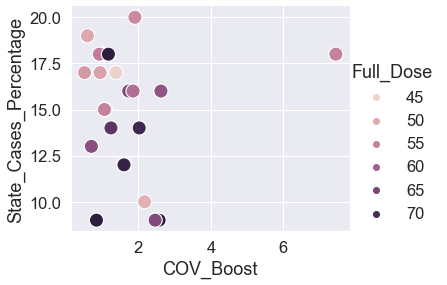

In [90]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set(style="white") #change style
sns.set_palette('viridis')
import os
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
sns.set(font_scale=1.5)
## Pairplots: Clicks by Sales, Sales Amount in USD 
sns.relplot(x="COV_Boost" , y="State_Cases_Percentage",  ci="sd", hue='Full_Dose',data=dat, height=4,aspect=10/8, s=200)
plt.show()



In [91]:
dat2=dat.drop(['State','Mask_Mandate'], axis=1)

dat2

,Total_Cases,State_Population,State_Cases_Percentage,COV_Boost,Mask_Wear,Male,Female,Age (years),One_Dose,Full_Dose,Diabetes,Cancer,Asthma
0,55279,"648,560",9,2.57,93.03,49.4,50.6,43.0,86,73,8.0,454.4,11.6
1,401163,4270000,9,2.46,93.07,49.2,50.8,39.6,72,64,9.7,412.2,11.1
2,130036,1370000,9,0.84,90.97,48.4,51.6,45.0,82,73,10.5,471.6,11.8
3,794529,7766925,10,2.17,93.22,49.7,50.3,37.8,73,49,8.8,435.1,9.9
4,998574,8670000,12,1.61,93.86,48.4,51.6,38.6,76,65,11.1,400.0,8.8
5,441346,3600000,12,1.60,95.70,48.7,51.3,41.1,84,72,9.5,464.7,10.5
6,5075951,39656838,13,0.70,95.93,49.4,50.6,37.0,79,63,10.2,392.4,7.8
7,975061,7100000,14,2.02,95.88,48.6,51.4,39.6,86,71,9.0,444.7,10.3
8,1299019,9400000,14,1.24,97.03,48.7,51.3,40.1,79,68,10.0,482.4,8.5
9,1898501,12850000,15,1.09,93.92,48.7,51.3,38.6,69,62,10.3,458.5,8.2


In [92]:
dat2.columns

Index(['Total_Cases', 'State_Population', 'State_Cases_Percentage',
       'COV_Boost', 'Mask_Wear', 'Male', 'Female', 'Age (years)', 'One_Dose',
       'Full_Dose', 'Diabetes ', 'Cancer', 'Asthma'],
      dtype='object')

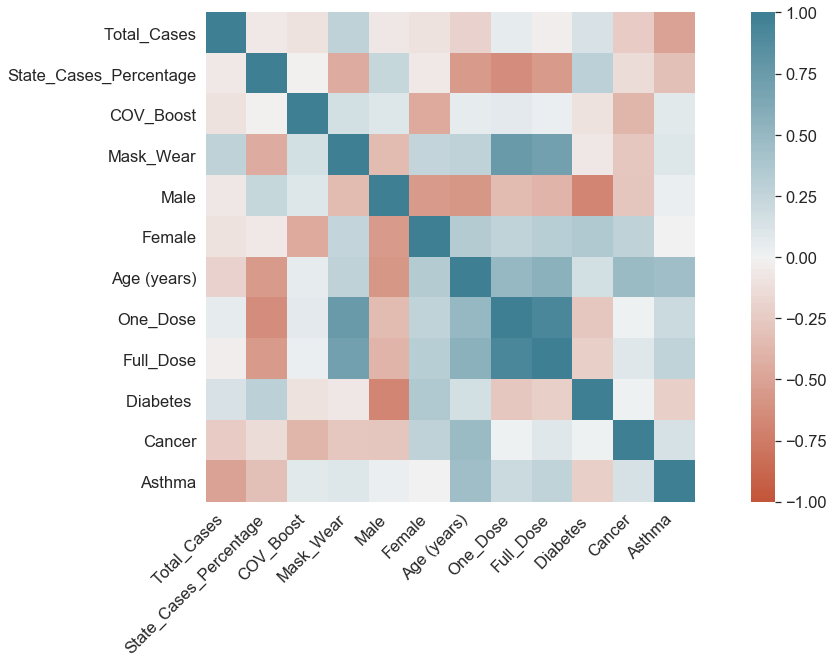

In [93]:
corr = dat2.corr()
plt.rcParams["figure.figsize"] = (20, 9)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

[Text(0.5, 0, 'Total_Cases'),
 Text(1.5, 0, 'State_Cases_Percentage'),
 Text(2.5, 0, 'COV_Boost'),
 Text(3.5, 0, 'Mask_Wear'),
 Text(4.5, 0, 'Male'),
 Text(5.5, 0, 'Female'),
 Text(6.5, 0, 'Age (years)'),
 Text(7.5, 0, 'One_Dose'),
 Text(8.5, 0, 'Full_Dose'),
 Text(9.5, 0, 'Diabetes '),
 Text(10.5, 0, 'Cancer'),
 Text(11.5, 0, 'Asthma')]

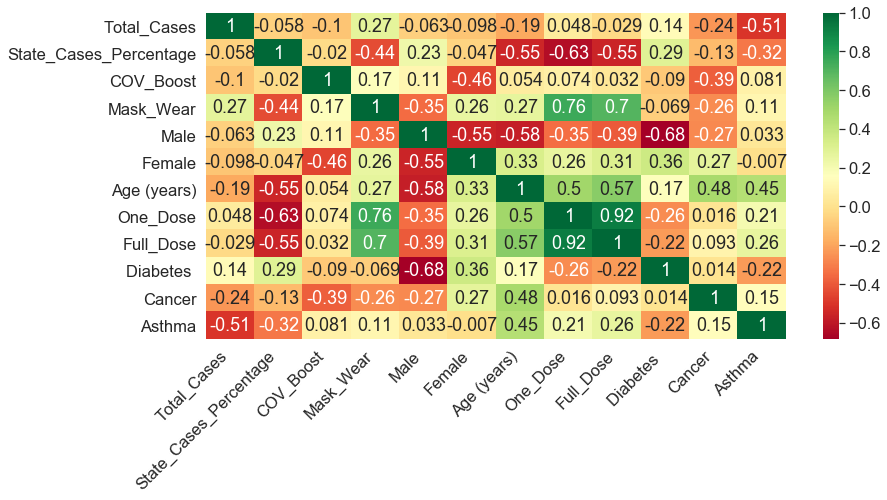

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
corrmat = dat2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(13,6))
sns.set(font_scale=1.5)
g=sns.heatmap(dat2[top_corr_features].corr(),annot=True,cmap="RdYlGn")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [95]:
dat2.columns

Index(['Total_Cases', 'State_Population', 'State_Cases_Percentage',
       'COV_Boost', 'Mask_Wear', 'Male', 'Female', 'Age (years)', 'One_Dose',
       'Full_Dose', 'Diabetes ', 'Cancer', 'Asthma'],
      dtype='object')

In [96]:
dat2.shape

(24, 13)

In [97]:
dat['State']

0            Vermont 
1              Oregon
2               Maine
3          Washington
4           Virginia 
5         Connecticut
6          California
7     Massachussetts 
8          New Jersey
9            Illinois
10           Michigan
11         New Mexico
12           Delaware
13           Nebraska
14              Idaho
15            Indiana
16           Oklahoma
17            Montana
18           Arkansas
19            Arizona
20               Utah
21       Rhode Island
22         Tennessee 
23             Alaska
Name: State, dtype: object

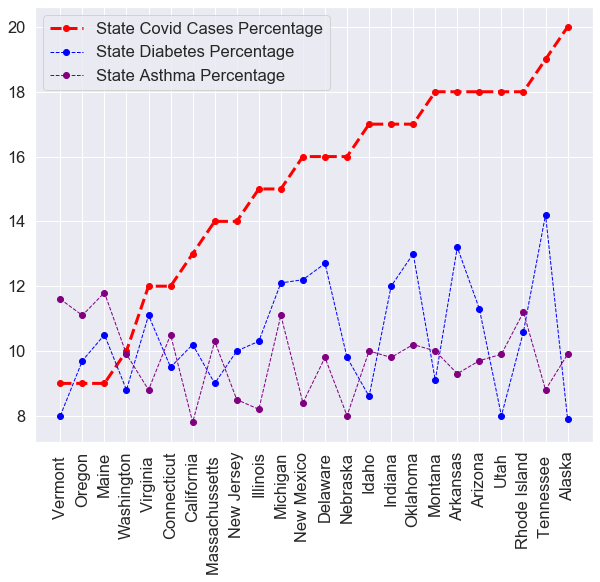

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
x = dat['State']
y1=dat2['State_Cases_Percentage']
y2=dat2['Diabetes ']
y3=dat2['Asthma']
y4=dat2['Mask_Wear']



plt.figure(figsize=(10, 8))
plt.plot(x, y1, color="red",linestyle='dashed', marker='o', linewidth=3, label="State Covid Cases Percentage")  
plt.plot(x, y2, color="blue",linestyle='dashed', marker='o', linewidth=1,label="State Diabetes Percentage")  
plt.plot(x, y3, color="purple", linestyle='dashed', marker='o',linewidth=1,label="State Asthma Percentage")


plt.xticks(rotation=90)

plt.legend()
plt.show() 

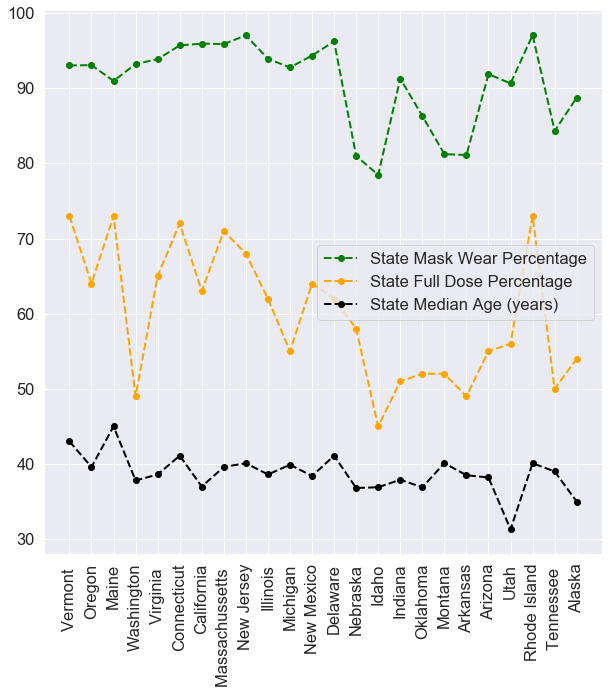

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
x = dat['State']
y4=dat2['Mask_Wear']
y5=dat2['Full_Dose']
y6=dat2['Age (years)']





plt.figure(figsize=(10, 10))
plt.plot(x, y4, color="green", linestyle='dashed', marker='o',linewidth=2,label="State Mask Wear Percentage")
plt.plot(x, y5, color="orange", linewidth=2,linestyle='dashed', marker='o', label="State Full Dose Percentage")  
plt.plot(x, y6, color="black", linewidth=2,linestyle='dashed', marker='o',label="State Median Age (years)")



plt.xticks(rotation=90)

plt.legend()
plt.show() 

# Section 3. Analyzing the Region-Health-Conditions-COVID data

In [93]:
# Read csv file into a pandas dataframe
df = pd.read_csv("Region_HealthConditions_COVID.csv", encoding= 'unicode_escape')


In [94]:
#Data Cleaning

In [95]:
#the total number of missing values 
print(df.isnull().values.sum())

53240


In [96]:
pd.set_option("display.max_columns", None)
df.head(5)

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",AnalysisDate,Note,flag_allcause,flag_natcause,flag_sept,flag_neopl,flag_diab,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke,flag_cov19mcod,flag_cov19ucod
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,NaN,0.0,31.0,NaN,27.0,NaN,217.0,34.0,NaN,0.0,0.0,8/25/2021,NaN,NaN,NaN,NaN,NaN,Suppressed (counts 1-9),NaN,NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,NaN,Suppressed (counts 1-9),NaN,NaN
1,2019,1,United States,15-24 years,2340.0,626.0,NaN,123.0,31.0,0.0,18.0,11.0,14.0,NaN,38.0,71.0,18.0,0.0,0.0,8/25/2021,NaN,NaN,NaN,Suppressed (counts 1-9),NaN,NaN,NaN,NaN,NaN,NaN,Suppressed (counts 1-9),NaN,NaN,NaN,NaN,NaN
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,55.0,24.0,29.0,27.0,66.0,285.0,46.0,0.0,0.0,8/25/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,120.0,64.0,53.0,70.0,82.0,886.0,131.0,0.0,0.0,8/25/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,285.0,352.0,149.0,221.0,120.0,2750.0,479.0,0.0,0.0,8/25/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
df.shape

(3410, 36)

In [98]:
df.columns

Index(['Date Of Death Year', 'Date Of Death Month', 'HHSRegion', 'AgeGroup',
       'AllCause', 'NaturalCause', 'Septicemia (A40-A41)',
       'Malignant neoplasms (C00-C97)', 'Diabetes mellitus (E10-E14)',
       'Alzheimer disease (G30)', 'Influenza and pneumonia (J09-J18)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
       'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Cerebrovascular diseases (I60-I69)',
       'COVID-19 (U071, Multiple Cause of Death)',
       'COVID-19 (U071, Underlying Cause of Death)', 'AnalysisDate', 'Note',
       'flag_allcause', 'flag_natcause', 'flag_sept', 'flag_neopl',
       'flag_diab', 'flag_alz', 'flag_inflpn', 'flag_clrd', 'flag_otherresp',
       'flag_nephr', 'flag_ot

In [99]:
# missing values
df.isnull().sum()

Date Of Death Year                                                                                      0
Date Of Death Month                                                                                     0
HHSRegion                                                                                               0
AgeGroup                                                                                                0
AllCause                                                                                               10
NaturalCause                                                                                           68
Septicemia (A40-A41)                                                                                 1070
Malignant neoplasms (C00-C97)                                                                         669
Diabetes mellitus (E10-E14)                                                                           644
Alzheimer disease (G30)                       

In [100]:
df2=df.drop([ 'Date Of Death Year', 'Date Of Death Month', 'HHSRegion', 
       'Cerebrovascular diseases (I60-I69)',
        'AnalysisDate', 'Note',
       'flag_allcause', 'flag_natcause', 'flag_sept', 'flag_neopl',
       'flag_diab', 'flag_alz', 'flag_inflpn', 'flag_clrd', 'flag_otherresp',
       'flag_nephr', 'flag_otherunk', 'flag_hd', 'flag_stroke',
       'flag_cov19mcod', 'flag_cov19ucod'], axis=1)

df2

,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)","COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
0,0-4 years,2022.0,1764.0,17.0,23.0,NaN,0.0,31.0,NaN,27.0,NaN,217.0,34.0,0.0,0.0
1,15-24 years,2340.0,626.0,NaN,123.0,31.0,0.0,18.0,11.0,14.0,NaN,38.0,71.0,0.0,0.0
2,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,55.0,24.0,29.0,27.0,66.0,285.0,0.0,0.0
3,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,120.0,64.0,53.0,70.0,82.0,886.0,0.0,0.0
4,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,285.0,352.0,149.0,221.0,120.0,2750.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405,5-14 years,18.0,11.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
3406,55-64 years,1204.0,1107.0,17.0,313.0,52.0,NaN,NaN,42.0,13.0,NaN,97.0,209.0,43.0,36.0
3407,65-74 years,2260.0,2139.0,22.0,651.0,121.0,27.0,18.0,141.0,26.0,23.0,61.0,414.0,84.0,78.0
3408,75-84 years,2484.0,2347.0,16.0,609.0,90.0,154.0,15.0,123.0,58.0,25.0,32.0,453.0,79.0,69.0


In [101]:
# missing values
df2.isnull().sum()

AgeGroup                                                                                                0
AllCause                                                                                               10
NaturalCause                                                                                           68
Septicemia (A40-A41)                                                                                 1070
Malignant neoplasms (C00-C97)                                                                         669
Diabetes mellitus (E10-E14)                                                                           644
Alzheimer disease (G30)                                                                               400
Influenza and pneumonia (J09-J18)                                                                    1122
Chronic lower respiratory diseases (J40-J47)                                                         1032
Other diseases of respiratory system (J00-J06,

In [102]:
# Dropping the rows that contain more than "thresh" NaN
df3=df2.dropna(thresh=15)
df3


,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)","COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
2,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,55.0,24.0,29.0,27.0,66.0,285.0,0.0,0.0
3,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,120.0,64.0,53.0,70.0,82.0,886.0,0.0,0.0
4,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,285.0,352.0,149.0,221.0,120.0,2750.0,0.0,0.0
6,55-64 years,33974.0,30925.0,550.0,9864.0,1452.0,97.0,655.0,1795.0,445.0,528.0,285.0,7490.0,0.0,0.0
7,65-74 years,49899.0,47776.0,802.0,14731.0,2097.0,667.0,991.0,3785.0,932.0,1038.0,332.0,11389.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3398,75-84 years,7309.0,7116.0,51.0,1832.0,262.0,385.0,86.0,406.0,105.0,139.0,128.0,1581.0,277.0,238.0
3399,85 years and over,9229.0,9017.0,54.0,1290.0,198.0,1030.0,161.0,399.0,92.0,149.0,92.0,2495.0,205.0,171.0
3407,65-74 years,2260.0,2139.0,22.0,651.0,121.0,27.0,18.0,141.0,26.0,23.0,61.0,414.0,84.0,78.0
3408,75-84 years,2484.0,2347.0,16.0,609.0,90.0,154.0,15.0,123.0,58.0,25.0,32.0,453.0,79.0,69.0


In [103]:
df3.shape

(1252, 15)

In [104]:
#the total number of missing values 
print(df3.isnull().values.sum())

0


In [105]:
# missing values
df3.isnull().sum()

AgeGroup                                                                                             0
AllCause                                                                                             0
NaturalCause                                                                                         0
Septicemia (A40-A41)                                                                                 0
Malignant neoplasms (C00-C97)                                                                        0
Diabetes mellitus (E10-E14)                                                                          0
Alzheimer disease (G30)                                                                              0
Influenza and pneumonia (J09-J18)                                                                    0
Chronic lower respiratory diseases (J40-J47)                                                         0
Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)       

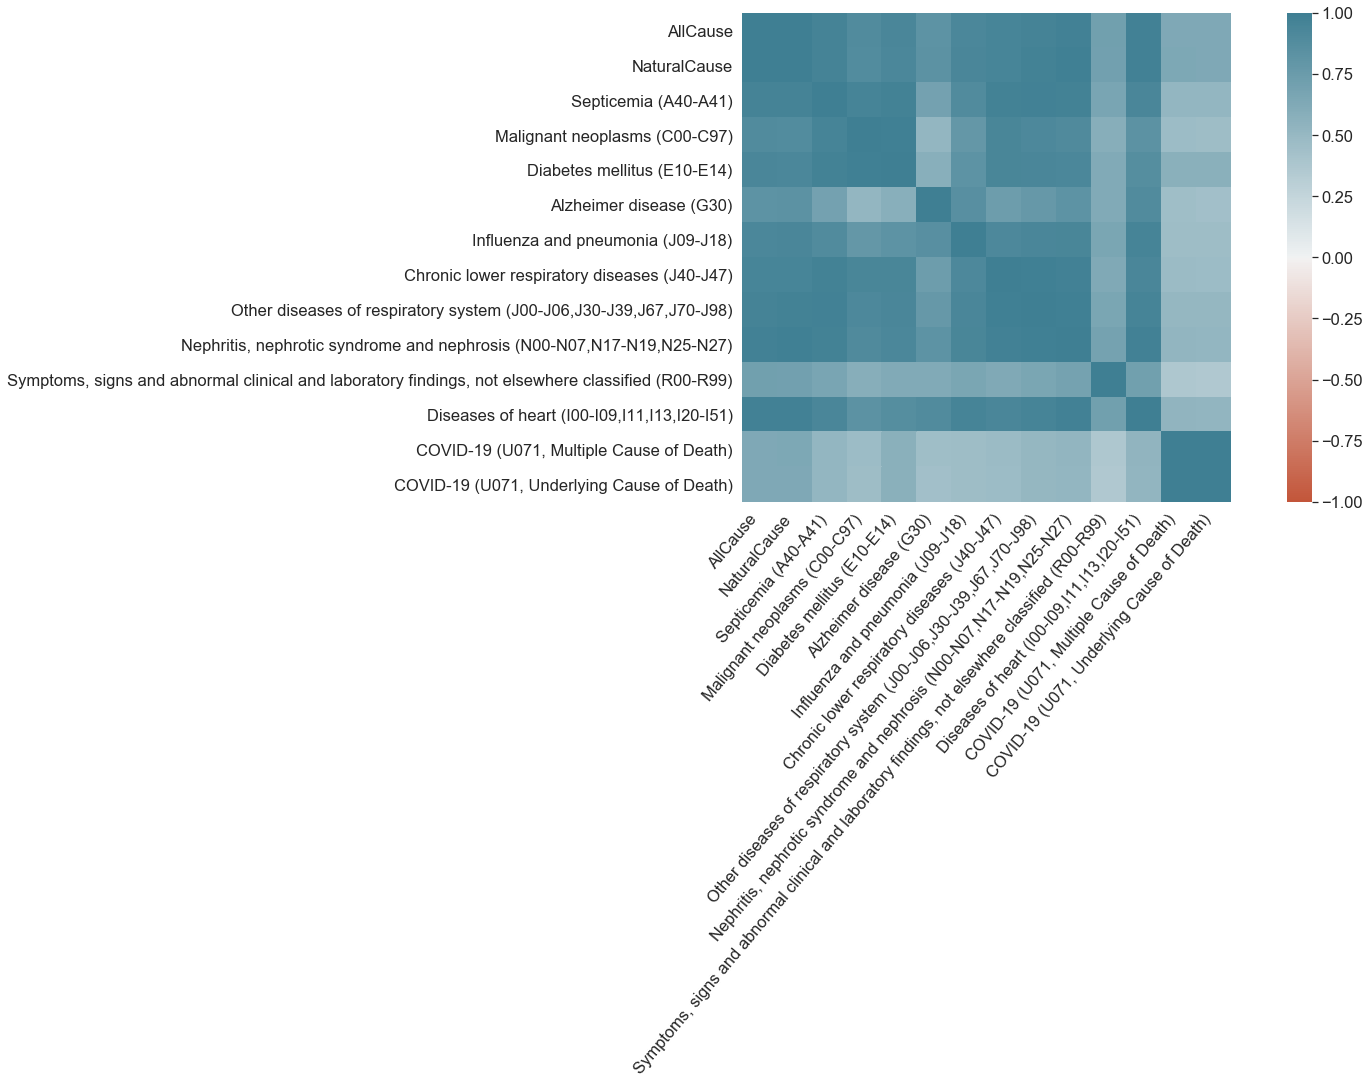

In [106]:
# Correction Matrix Plot: if the correlation score is close to one, it means there exists a strong positive correlation between two varaibles
import matplotlib.pyplot as plt
import pandas
import numpy
corr = df3.corr()
plt.rcParams["figure.figsize"] = (20, 9)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=256),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=50,
    horizontalalignment='right'
);

We now use heatmap for some important features to see how they are correlated! 

[Text(0.5, 0, 'AllCause'),
 Text(1.5, 0, 'NaturalCause'),
 Text(2.5, 0, 'Septicemia (A40-A41)'),
 Text(3.5, 0, 'Malignant neoplasms (C00-C97)'),
 Text(4.5, 0, 'Diabetes mellitus (E10-E14)'),
 Text(5.5, 0, 'Alzheimer disease (G30)'),
 Text(6.5, 0, 'Influenza and pneumonia (J09-J18)'),
 Text(7.5, 0, 'Chronic lower respiratory diseases (J40-J47)'),
 Text(8.5, 0, 'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)'),
 Text(9.5, 0, 'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)'),
 Text(10.5, 0, 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)'),
 Text(11.5, 0, 'Diseases of heart (I00-I09,I11,I13,I20-I51)'),
 Text(12.5, 0, 'COVID-19 (U071, Multiple Cause of Death)'),
 Text(13.5, 0, 'COVID-19 (U071, Underlying Cause of Death)')]

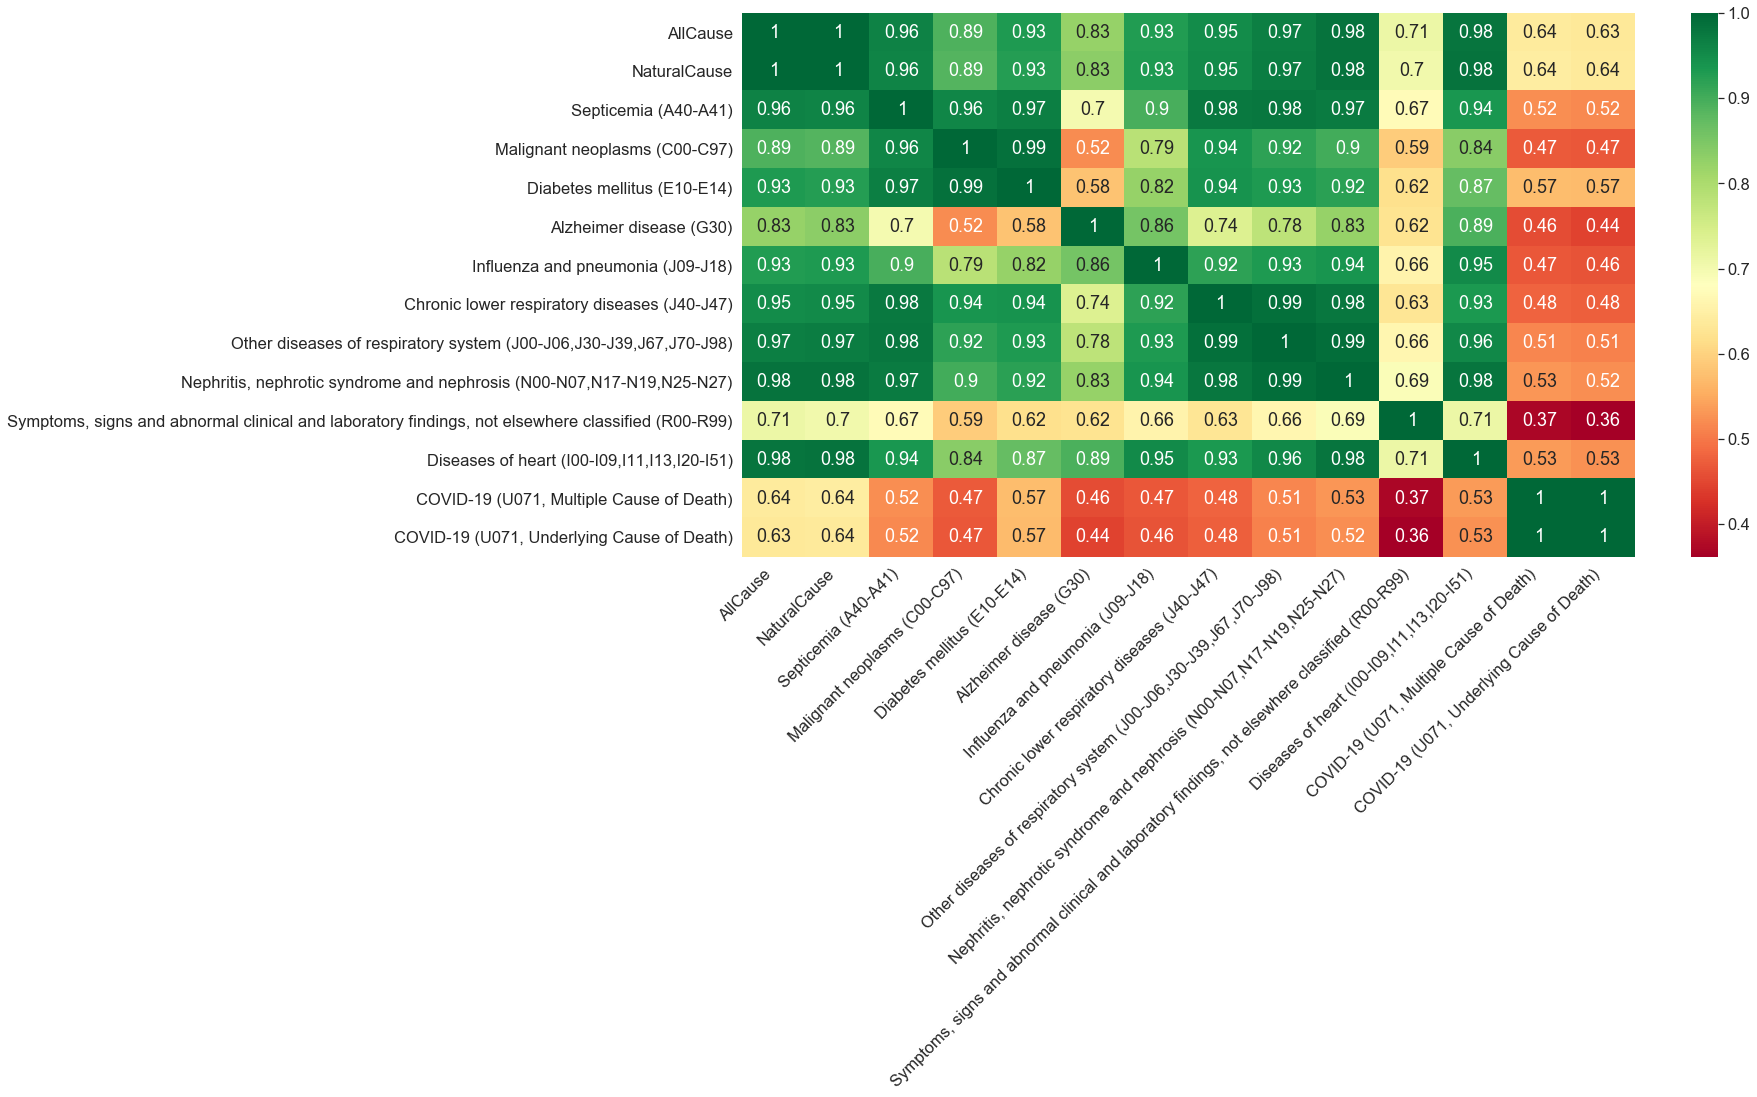

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
# split into input (X) and output (y) variables
X = df3.loc[:,df3.columns !='COVID-19 (U071, Underlying Cause of Death)']
y = df3['COVID-19 (U071, Underlying Cause of Death)']
corrmat = df3.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5)

g=sns.heatmap(df3[top_corr_features].corr(),annot=True,cmap="RdYlGn")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


We now use MinMaxScalar normalization to normalize the data and compare the results

In [113]:
df3.columns

Index(['AgeGroup', 'AllCause', 'NaturalCause', 'Septicemia (A40-A41)',
       'Malignant neoplasms (C00-C97)', 'Diabetes mellitus (E10-E14)',
       'Alzheimer disease (G30)', 'Influenza and pneumonia (J09-J18)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
       'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'COVID-19 (U071, Multiple Cause of Death)',
       'COVID-19 (U071, Underlying Cause of Death)'],
      dtype='object')

In [114]:
df4=df3.drop(['AgeGroup' ], axis=1)

[Text(0.5, 0, '0'),
 Text(1.5, 0, '1'),
 Text(2.5, 0, '2'),
 Text(3.5, 0, '3'),
 Text(4.5, 0, '4'),
 Text(5.5, 0, '5'),
 Text(6.5, 0, '6'),
 Text(7.5, 0, '7'),
 Text(8.5, 0, '8'),
 Text(9.5, 0, '9'),
 Text(10.5, 0, '10'),
 Text(11.5, 0, '11'),
 Text(12.5, 0, '12'),
 Text(13.5, 0, '13')]

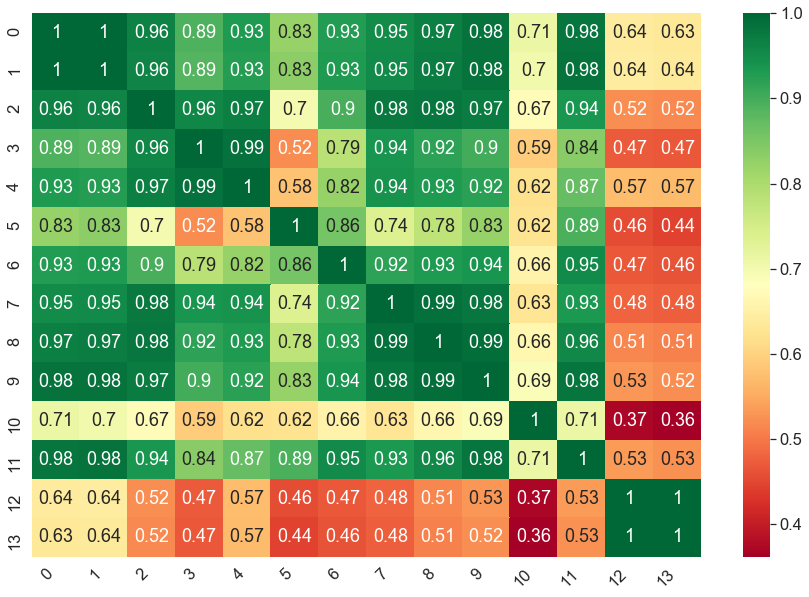

In [115]:
#Using MinMaxScalar Normalization on the dataset to see whether the correlation scores stay unchanged
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
trans = MinMaxScaler()
data = trans.fit_transform(df4)
dataset = DataFrame(data)
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,10))
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')



Feature score by means of regression. We choose 'new cases' as the target vaariable and find the feature scores of other variables. 

In [116]:
df4.columns

Index(['AllCause', 'NaturalCause', 'Septicemia (A40-A41)',
       'Malignant neoplasms (C00-C97)', 'Diabetes mellitus (E10-E14)',
       'Alzheimer disease (G30)', 'Influenza and pneumonia (J09-J18)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
       'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'COVID-19 (U071, Multiple Cause of Death)',
       'COVID-19 (U071, Underlying Cause of Death)'],
      dtype='object')

In [117]:
# split into input (X) and output (y) variables
X = df4.loc[:,df4.columns !='COVID-19 (U071, Underlying Cause of Death)']
y = df4['COVID-19 (U071, Underlying Cause of Death)']
# summarize
print('Input', X.shape)
print('Output', y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_tr=X_train
y_tr=y_train
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Input (1252, 13)
Output (1252,)
Train (838, 13) (838,)
Test (414, 13) (414,)


In [118]:
df4.columns

Index(['AllCause', 'NaturalCause', 'Septicemia (A40-A41)',
       'Malignant neoplasms (C00-C97)', 'Diabetes mellitus (E10-E14)',
       'Alzheimer disease (G30)', 'Influenza and pneumonia (J09-J18)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
       'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'COVID-19 (U071, Multiple Cause of Death)',
       'COVID-19 (U071, Underlying Cause of Death)'],
      dtype='object')

Feature 0: 476.013823
Feature 1: 485.279278
Feature 2: 277.626325
Feature 3: 227.033479
Feature 4: 376.771441
Feature 5: 147.607326
Feature 6: 192.488522
Feature 7: 206.390164
Feature 8: 250.653225
Feature 9: 248.774874
Feature 10: 99.016795
Feature 11: 263.520376
Feature 12: 889598.494716


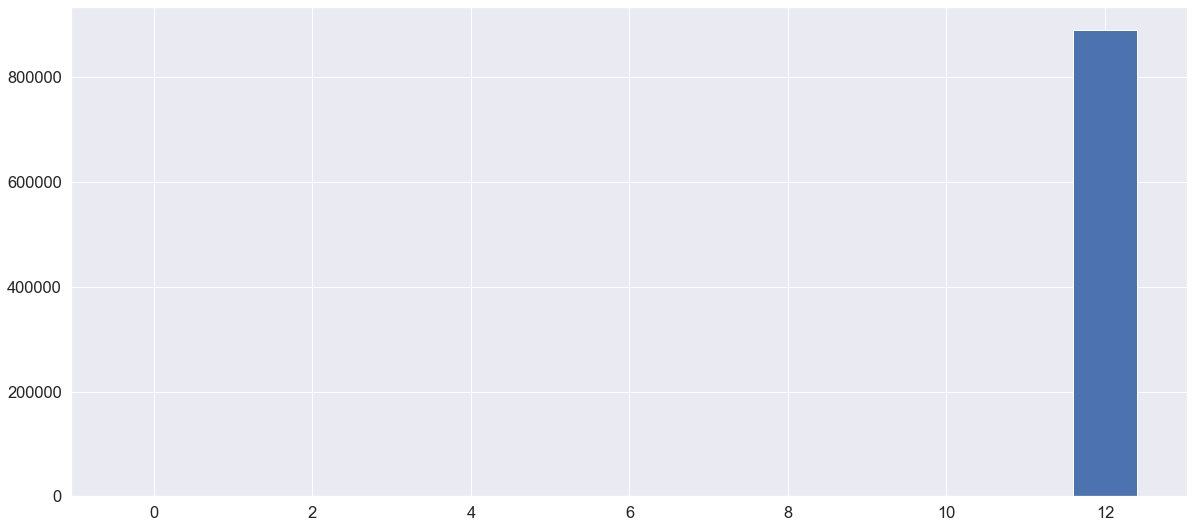

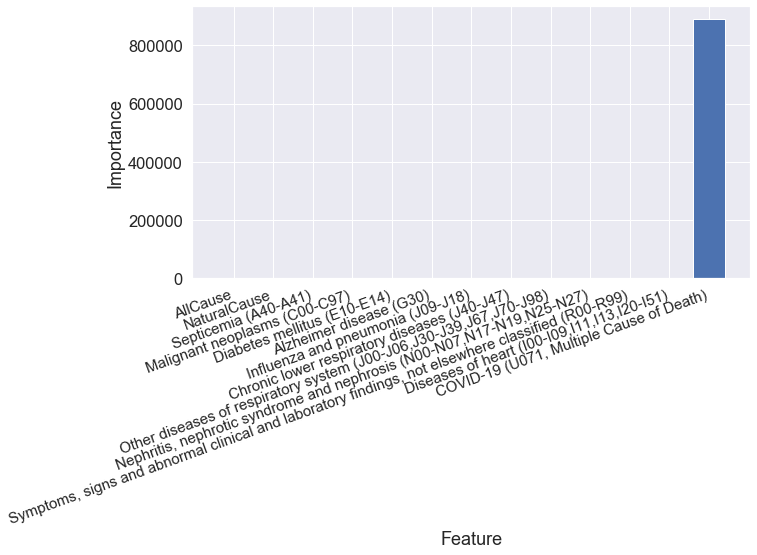

In [123]:
# Selecting the top k most relevant features by the means of regression
def feaure_selection(X_train, y_train, X_test):
	feat = SelectKBest(score_func=f_regression, k='all')
	feat.fit(X_train, y_train)
	X_train_feat = feat.transform(X_train)
	X_test_feat = feat.transform(X_test)
	return X_train_feat, X_test_feat, feat
X_train_feat, X_test_feat, feat = feaure_selection(X_train, y_train, X_test)
for i in range(len(feat.scores_)):
	print('Feature %d: %f' % (i, feat.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(feat.scores_))], feat.scores_)
pyplot.show()

C = ['AllCause', 'NaturalCause', 'Septicemia (A40-A41)',
       'Malignant neoplasms (C00-C97)', 'Diabetes mellitus (E10-E14)',
       'Alzheimer disease (G30)', 'Influenza and pneumonia (J09-J18)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
       'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'COVID-19 (U071, Multiple Cause of Death)']
GC = feat.scores_
# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.xticks(rotation=20, ha='right',size = 15)
plt.grid(True)
plt.bar(C, GC)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()


In [124]:
#Since COVID-19 (U071, Multiple Cause of Death) has a strong correlation with our target variable, we remove it from the dataset to let the model explore other features' details

In [125]:
df4.columns

Index(['AllCause', 'NaturalCause', 'Septicemia (A40-A41)',
       'Malignant neoplasms (C00-C97)', 'Diabetes mellitus (E10-E14)',
       'Alzheimer disease (G30)', 'Influenza and pneumonia (J09-J18)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
       'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'COVID-19 (U071, Multiple Cause of Death)',
       'COVID-19 (U071, Underlying Cause of Death)'],
      dtype='object')

In [126]:
df5=df4.drop(['COVID-19 (U071, Multiple Cause of Death)' ], axis=1)

In [127]:
# split into input (X) and output (y) variables
X = df5.loc[:,df5.columns !='COVID-19 (U071, Underlying Cause of Death)']
y = df5['COVID-19 (U071, Underlying Cause of Death)']
# summarize
print('Input', X.shape)
print('Output', y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_tr=X_train
y_tr=y_train
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Input (1252, 12)
Output (1252,)
Train (838, 12) (838,)
Test (414, 12) (414,)


Feature 0: 476.013823
Feature 1: 485.279278
Feature 2: 277.626325
Feature 3: 227.033479
Feature 4: 376.771441
Feature 5: 147.607326
Feature 6: 192.488522
Feature 7: 206.390164
Feature 8: 250.653225
Feature 9: 248.774874
Feature 10: 99.016795
Feature 11: 263.520376


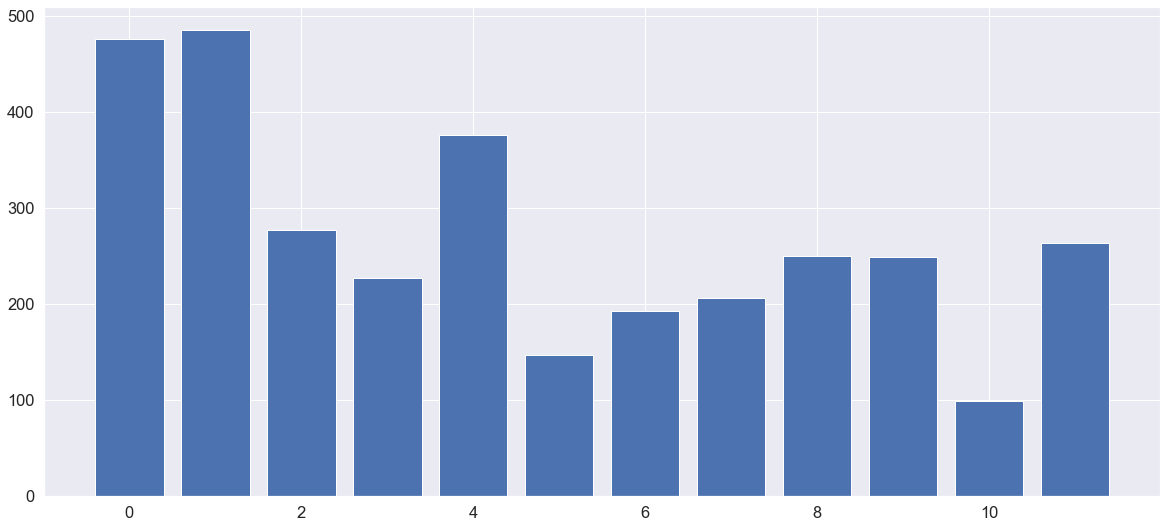

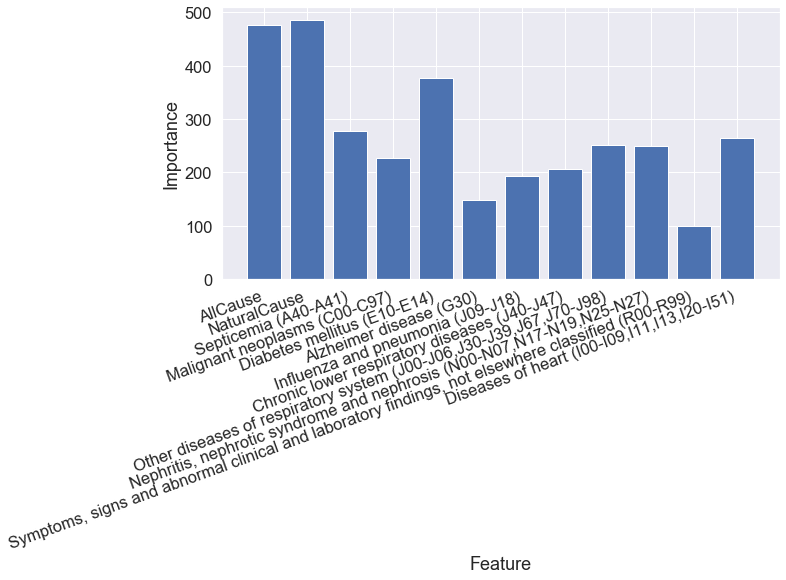

In [128]:
# Selecting the top k most relevant features by the means of regression
def feaure_selection(X_train, y_train, X_test):
	feat = SelectKBest(score_func=f_regression, k='all')
	feat.fit(X_train, y_train)
	X_train_feat = feat.transform(X_train)
	X_test_feat = feat.transform(X_test)
	return X_train_feat, X_test_feat, feat
X_train_feat, X_test_feat, feat = feaure_selection(X_train, y_train, X_test)
for i in range(len(feat.scores_)):
	print('Feature %d: %f' % (i, feat.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(feat.scores_))], feat.scores_)
pyplot.show()

C = ['AllCause', 'NaturalCause', 'Septicemia (A40-A41)',
       'Malignant neoplasms (C00-C97)', 'Diabetes mellitus (E10-E14)',
       'Alzheimer disease (G30)', 'Influenza and pneumonia (J09-J18)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
       'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)']
GC = feat.scores_
# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.xticks(rotation=20, ha='right')
plt.grid(True)
plt.bar(C, GC)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()


# Section 4. Analyzing the Mexican covid Data

In [17]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")



In [18]:
# Read csv file into a pandas dataframe
df = pd.read_csv("covid (without pending).csv", encoding= 'unicode_escape')


In [19]:
#the total number of missing values 
print(df.isnull().values.sum())

0


In [20]:
pd.set_option("display.max_columns", None)
df.head(5)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,4/5/2020,2/5/2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,6/4/2020,1/4/2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10/4/2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


In [21]:
df.shape

(499692, 23)

In [22]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [23]:
# Drop Unnecessary columns
df2=df.drop(['id', 'entry_date', 'date_symptoms', 'date_died',
        ], axis=1)

In [24]:
df2.shape

(499692, 19)

In [25]:
df2.columns

Index(['sex', 'patient_type', 'intubed', 'pneumonia', 'age', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'covid_res', 'icu'],
      dtype='object')

In [26]:
from bioinfokit.analys import stat, get_data
res = stat()
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [27]:
# Chi-Squared Test for Covid vs Diabetes
CovidDiabetes = pd.crosstab(df2['covid_res'],df2['diabetes'],margins = False)
table= CovidDiabetes
print(CovidDiabetes)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

diabetes      1       2    98
covid_res                    
1          36187  183618  852
2          26162  252084  789
dof=2
[[ 27532.44657309 192399.91077304    724.64265387]
 [ 34816.55342691 243302.08922696    916.35734613]]
probability=0.950, critical=5.991, stat=5629.692
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [28]:
# Chi-Squared Test for Covid vs asthma
Covidasthma = pd.crosstab(df2['covid_res'],df2['asthma'],margins = False)
table= Covidasthma
print(Covidasthma)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

asthma        1       2    98
covid_res                    
1           6063  213821  773
2          10151  268215  669
dof=2
[[  7159.87567942 212860.35728409    636.76703649]
 [  9054.12432058 269175.64271591    805.23296351]]
probability=0.950, critical=5.991, stat=360.880
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [29]:
# Chi-Squared Test for Covid vs tobacco
Covidtobacco = pd.crosstab(df2['covid_res'],df2['tobacco'],margins = False)
table= Covidtobacco
print(Covidtobacco)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

tobacco       1       2    98
covid_res                    
1          17109  202691  857
2          25846  252467  722
dof=2
[[ 18968.32735965 200991.40831952    697.26432082]
 [ 23986.67264035 254166.59168048    881.73567918]]
probability=0.950, critical=5.991, stat=417.651
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [30]:
# Chi-Squared Test for Covid vs other_disease
Covidother_disease = pd.crosstab(df2['covid_res'],df2['other_disease'],margins = False)
table= Covidother_disease
print(Covidother_disease)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

other_disease    1       2     98
covid_res                        
1              6283  213226  1148
2              9109  268881  1045
dof=2
[[  6796.89197346 212891.70989129    968.39813525]
 [  8595.10802654 269215.29010871   1224.60186475]]
probability=0.950, critical=5.991, stat=130.169
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [31]:
# Chi-Squared Test for Covid cardiovascular
Covidcardiovascular = pd.crosstab(df2['covid_res'],df2['cardiovascular'],margins = False)
table= Covidcardiovascular
print(Covidcardiovascular)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

cardiovascular    1       2    98
covid_res                        
1               5162  214671  824
2               6257  272093  685
dof=2
[[  5042.47072797 214948.1759724     666.35329963]
 [  6376.52927203 271815.8240276     842.64670037]]
probability=0.950, critical=5.991, stat=72.504
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [32]:
# Chi-Squared Test for Covid hypertension
Covidhypertension = pd.crosstab(df2['covid_res'],df2['hypertension'],margins = False)
table= Covidhypertension
print(Covidhypertension)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

hypertension     1       2    98
covid_res                       
1             44297  175560  800
2             37043  241303  689
dof=2
[[ 35918.60662168 184080.87179903    657.52157929]
 [ 45421.39337832 232782.12820097    831.47842071]]
probability=0.950, critical=5.991, stat=4261.431
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [33]:
# Chi-Squared Test for Covid renal_chronic
Covidrenal_chronic = pd.crosstab(df2['covid_res'],df2['renal_chronic'],margins = False)
table= Covidrenal_chronic
print(Covidrenal_chronic)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

renal_chronic    1       2    98
covid_res                       
1              4789  215072  796
2              5230  273125  680
dof=2
[[  4424.25030419 215580.96873474    651.78096107]
 [  5594.74969581 272616.03126526    824.21903893]]
probability=0.950, critical=5.991, stat=113.149
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [34]:
df2.columns

Index(['sex', 'patient_type', 'intubed', 'pneumonia', 'age', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'covid_res', 'icu'],
      dtype='object')

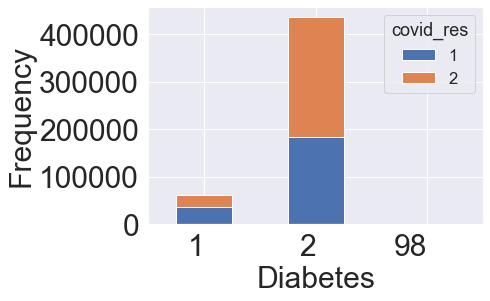

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

df2.groupby(['diabetes','covid_res']).size().unstack().plot(kind='bar',stacked=True)
plt.xticks(rotation=0, ha='right',size = 30)
plt.yticks(rotation=0, ha='right',size = 30)
plt.xlabel('Diabetes',size = 30)
plt.ylabel('Frequency',size = 30)
plt.show()


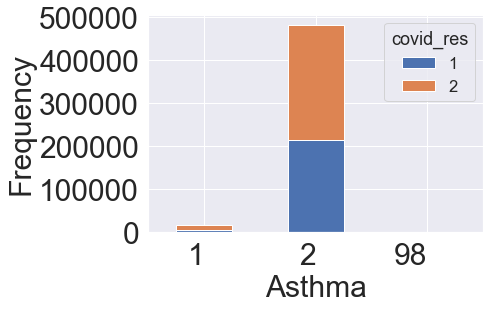

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

df2.groupby(['asthma','covid_res']).size().unstack().plot(kind='bar',stacked=True)
plt.xticks(rotation=0, ha='right',size = 30)
plt.yticks(rotation=0, ha='right',size = 30)
plt.xlabel('Asthma',size = 30)
plt.ylabel('Frequency',size = 30)
plt.show()

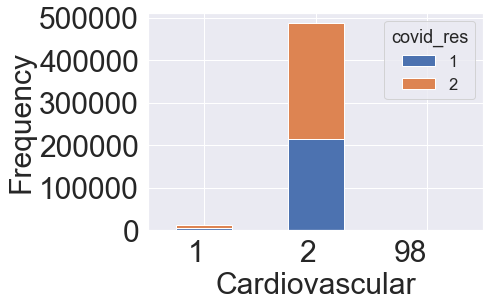

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

df2.groupby(['cardiovascular','covid_res']).size().unstack().plot(kind='bar',stacked=True)
plt.xticks(rotation=0, ha='right',size = 30)
plt.yticks(rotation=0, ha='right',size = 30)
plt.ylabel('Frequency',size = 30)
plt.xlabel('Cardiovascular',size = 30)
plt.show()



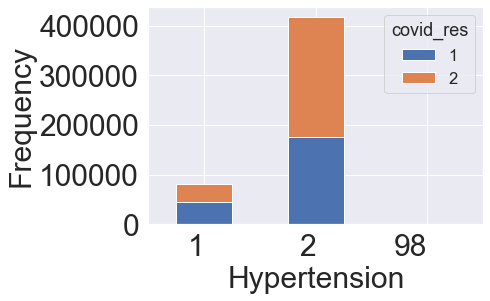

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

df2.groupby(['hypertension','covid_res']).size().unstack().plot(kind='bar',stacked=True)
plt.xticks(rotation=0, ha='right',size = 30)
plt.yticks(rotation=0, ha='right',size = 30)
plt.ylabel('Frequency',size = 30)
plt.xlabel('Hypertension',size = 30)
plt.show()


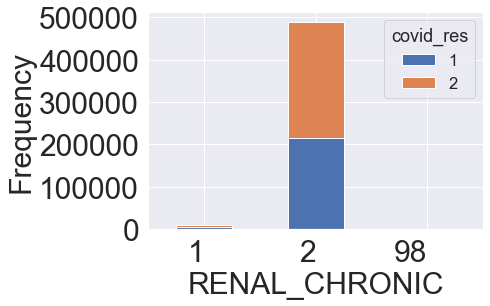

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

df2.groupby(['renal_chronic','covid_res']).size().unstack().plot(kind='bar',stacked=True)
plt.xticks(rotation=0, ha='right',size = 30)
plt.yticks(rotation=0, ha='right',size = 30)
plt.ylabel('Frequency',size = 30)
plt.xlabel('RENAL_CHRONIC',size = 30)
plt.show()


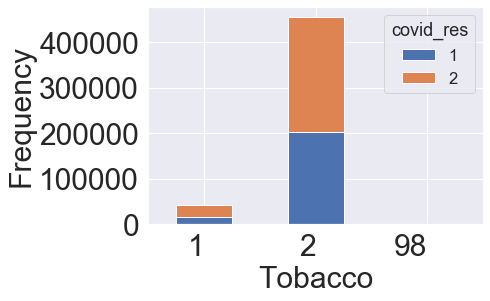

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

df2.groupby(['tobacco','covid_res']).size().unstack().plot(kind='bar',stacked=True)
plt.xticks(rotation=0, ha='right',size = 30)
plt.yticks(rotation=0, ha='right',size = 30)
plt.ylabel('Frequency',size = 30)
plt.xlabel('Tobacco',size = 30)
plt.show()


In [68]:
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [69]:
data=df2.drop(['age'], axis=1)

In [70]:
data.columns

Index(['sex', 'patient_type', 'intubed', 'pneumonia', 'pregnancy', 'diabetes',
       'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease',
       'cardiovascular', 'obesity', 'renal_chronic', 'tobacco',
       'contact_other_covid', 'covid_res', 'icu'],
      dtype='object')

In [71]:

# split into input (X) and output (y) variables
X = data.loc[:,data.columns !='covid_res'].astype(str)
y = data['covid_res'].astype(str)
# summarize
print('Input', X.shape)
print('Output', y.shape)
# one hot encode input variables
onehot_encoder = OneHotEncoder(sparse=False)
X = onehot_encoder.fit_transform(X)
# ordinal encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_tr=X_train
y_tr=y_train



Input (499692, 17)
Output (499692,)


In [72]:
data.columns

Index(['sex', 'patient_type', 'intubed', 'pneumonia', 'pregnancy', 'diabetes',
       'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease',
       'cardiovascular', 'obesity', 'renal_chronic', 'tobacco',
       'contact_other_covid', 'covid_res', 'icu'],
      dtype='object')

Feature: 0, Score: 0.74893
Feature: 1, Score: 0.30640
Feature: 2, Score: 3.69293
Feature: 3, Score: 18.82486
Feature: 4, Score: 7.49348
Feature: 5, Score: 6.55190
Feature: 6, Score: 1.91621
Feature: 7, Score: 1.87207
Feature: 8, Score: 3.60146
Feature: 9, Score: 3.46945
Feature: 10, Score: 4.34587
Feature: 11, Score: 1.86829
Feature: 12, Score: 9.27985
Feature: 13, Score: 2.46790
Feature: 14, Score: 3.01157
Feature: 15, Score: 18.21722
Feature: 16, Score: 12.33162


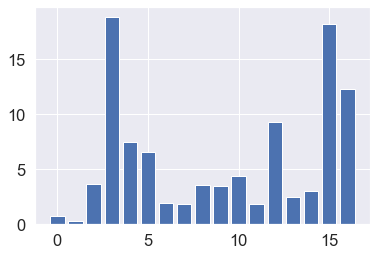

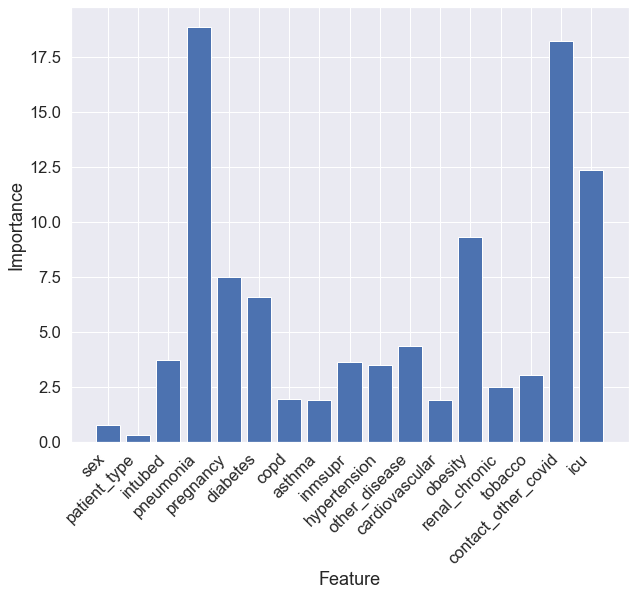

Feature: 0, Score: 1.11086
Feature: 1, Score: 0.51962
Feature: 2, Score: 4.28102
Feature: 3, Score: 16.92328
Feature: 4, Score: 7.21449
Feature: 5, Score: 6.57556
Feature: 6, Score: 2.32913
Feature: 7, Score: 1.91255
Feature: 8, Score: 3.65317
Feature: 9, Score: 4.05846
Feature: 10, Score: 4.55615
Feature: 11, Score: 2.34747
Feature: 12, Score: 8.95588
Feature: 13, Score: 2.66824
Feature: 14, Score: 3.35504
Feature: 15, Score: 17.97808
Feature: 16, Score: 11.56100


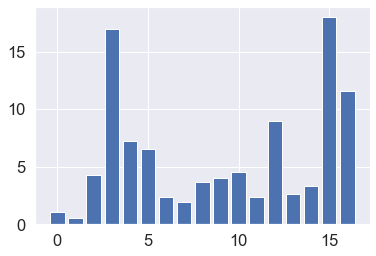

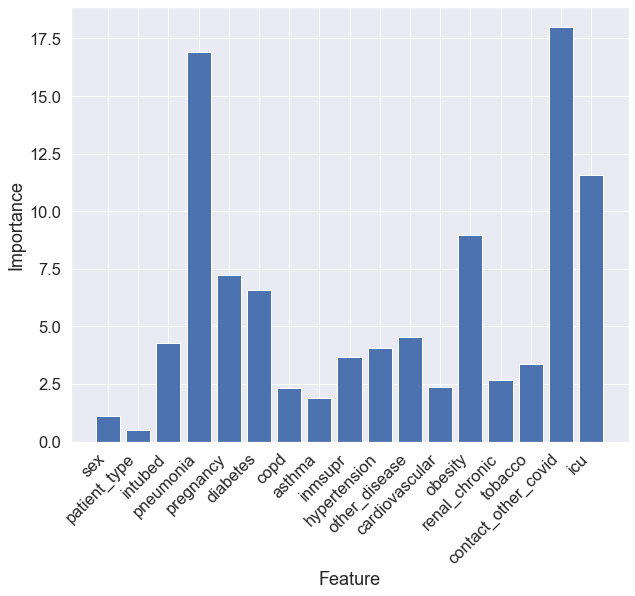

Feature: 0, Score: 2.76492
Feature: 1, Score: 3.25235
Feature: 2, Score: 7.61967
Feature: 3, Score: 13.36814
Feature: 4, Score: 5.60094
Feature: 5, Score: 6.74572
Feature: 6, Score: 3.34263
Feature: 7, Score: 2.71725
Feature: 8, Score: 4.37045
Feature: 9, Score: 4.94772
Feature: 10, Score: 5.04180
Feature: 11, Score: 3.20892
Feature: 12, Score: 8.14344
Feature: 13, Score: 3.43437
Feature: 14, Score: 4.20879
Feature: 15, Score: 15.17744
Feature: 16, Score: 6.05543


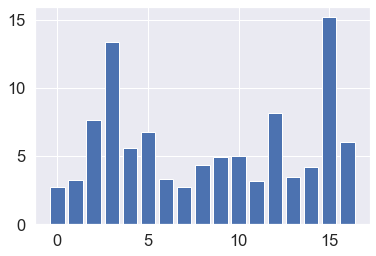

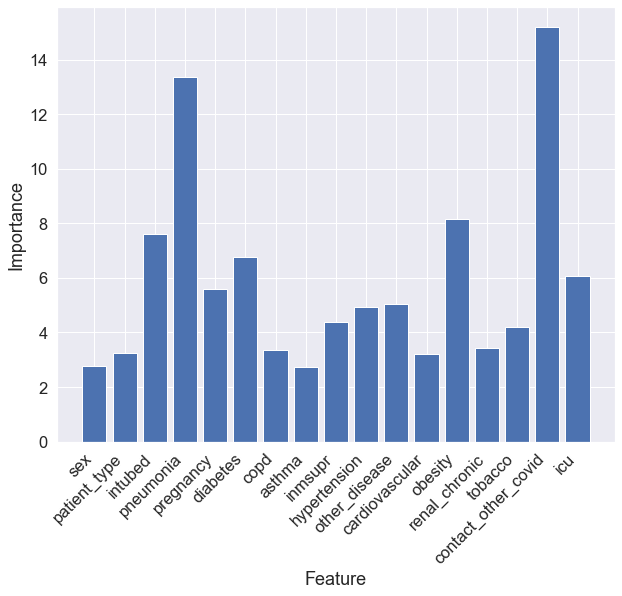

In [75]:
#Catboost Feature Importance Scores
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
empty=[]
X = data.loc[:,data.columns !='covid_res'].astype(str)
y = data['covid_res'].astype(str)
index=[10, 100, 1000]
for t in index:
    n_scores = cross_val_score(model, X, y, scoring='accuracy', n_jobs=-1, error_score='raise')
    empty.append(mean(n_scores))
    model = CatBoostClassifier(verbose=0, n_estimators=t)
    model.fit(X, y)
    names = range(4,11)
    values = empty
    importance = model.feature_importances_
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()
    import matplotlib.pyplot as plt
    C = ['sex', 'patient_type', 'intubed', 'pneumonia', 'pregnancy', 'diabetes',
           'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease',
           'cardiovascular', 'obesity', 'renal_chronic', 'tobacco',
           'contact_other_covid', 'icu']
    GC = importance
    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(8)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.bar(C, GC)
    plt.ylabel('Importance')
    plt.xlabel('Feature')
    plt.show()

In [62]:
df2.columns

Index(['sex', 'patient_type', 'intubed', 'pneumonia', 'age', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'covid_res', 'icu'],
      dtype='object')

In [77]:
data=df2.drop(['age', 'patient_type', 'sex', 'other_disease', 'icu','intubed', 'pneumonia'], axis=1)

Feature: 0, Score: 17.79407
Feature: 1, Score: 17.39740
Feature: 2, Score: 0.91460
Feature: 3, Score: 2.71715
Feature: 4, Score: 2.53751
Feature: 5, Score: 9.07159
Feature: 6, Score: 1.35150
Feature: 7, Score: 13.99396
Feature: 8, Score: 1.70560
Feature: 9, Score: 4.93707
Feature: 10, Score: 27.57955


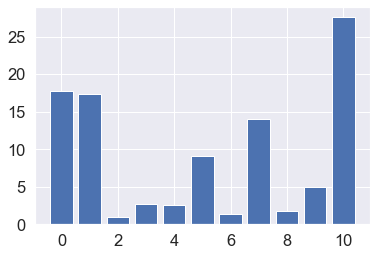

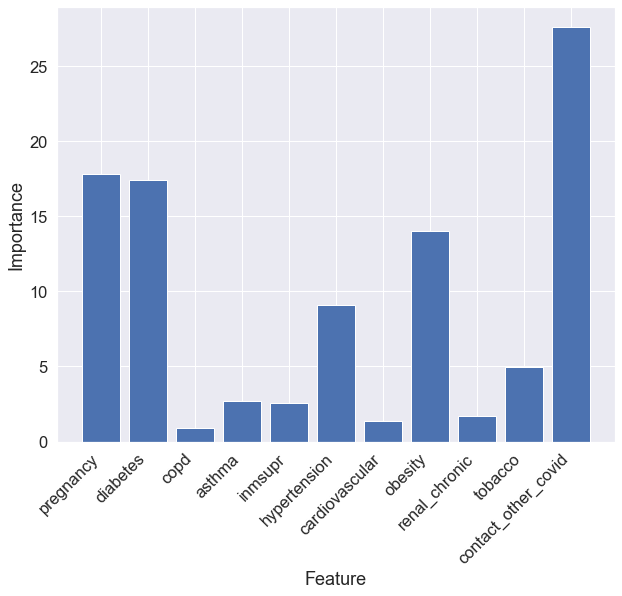

Feature: 0, Score: 17.79407
Feature: 1, Score: 17.39740
Feature: 2, Score: 0.91460
Feature: 3, Score: 2.71715
Feature: 4, Score: 2.53751
Feature: 5, Score: 9.07159
Feature: 6, Score: 1.35150
Feature: 7, Score: 13.99396
Feature: 8, Score: 1.70560
Feature: 9, Score: 4.93707
Feature: 10, Score: 27.57955


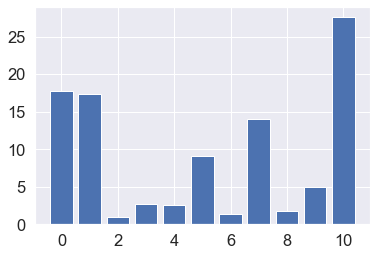

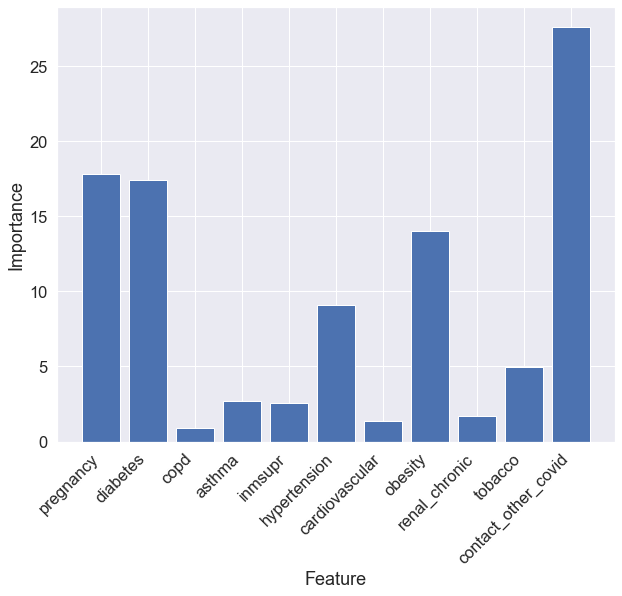

Feature: 0, Score: 17.79407
Feature: 1, Score: 17.39740
Feature: 2, Score: 0.91460
Feature: 3, Score: 2.71715
Feature: 4, Score: 2.53751
Feature: 5, Score: 9.07159
Feature: 6, Score: 1.35150
Feature: 7, Score: 13.99396
Feature: 8, Score: 1.70560
Feature: 9, Score: 4.93707
Feature: 10, Score: 27.57955


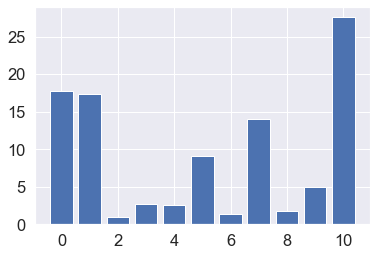

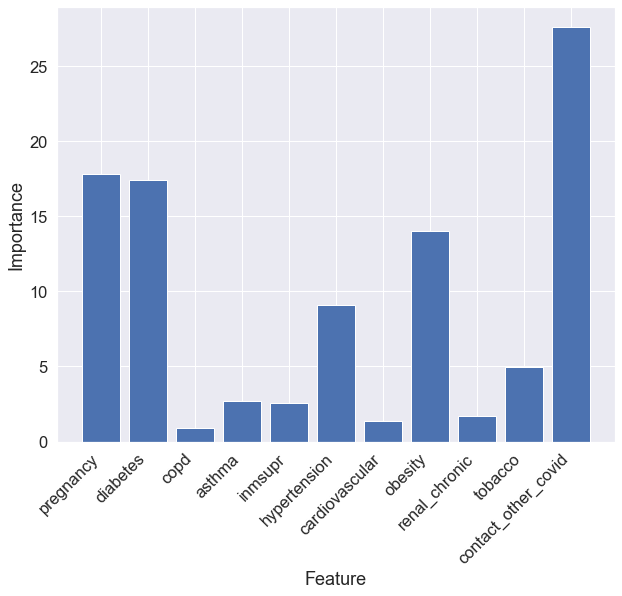

In [79]:
#Catboost Feature Importance Scores
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
empty=[]
X = data.loc[:,data.columns !='covid_res'].astype(str)
y = data['covid_res'].astype(str)
index=[10,100, 1000]
for p in index:
    model = CatBoostClassifier(verbose=0, n_estimators=p)
    n_scores = cross_val_score(model, X, y, scoring='accuracy', n_jobs=-1, error_score='raise')
    # fit the model on the whole dataset
    empty.append(mean(n_scores))
    model = CatBoostClassifier(verbose=0, n_estimators=10)
    model.fit(X, y)
    names = range(4,11)
    values = empty
    # get importance
    importance = model.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()
    import matplotlib.pyplot as plt
    C = [ 'pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
           'cardiovascular', 'obesity', 'renal_chronic', 'tobacco',
           'contact_other_covid']
    GC = importance
    # plotting a line plot after changing it's width and height
    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(8)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)

    plt.bar(C, GC)
    plt.ylabel('Importance')
    plt.xlabel('Feature')
    plt.show()

Feature: 0, Score: 17.79407
Feature: 1, Score: 17.39740
Feature: 2, Score: 0.91460
Feature: 3, Score: 2.71715
Feature: 4, Score: 2.53751
Feature: 5, Score: 9.07159
Feature: 6, Score: 1.35150
Feature: 7, Score: 13.99396
Feature: 8, Score: 1.70560
Feature: 9, Score: 4.93707
Feature: 10, Score: 27.57955


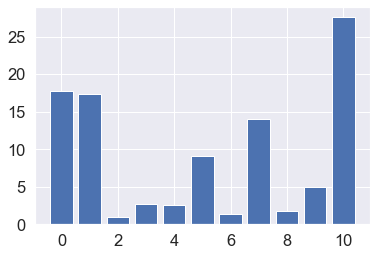

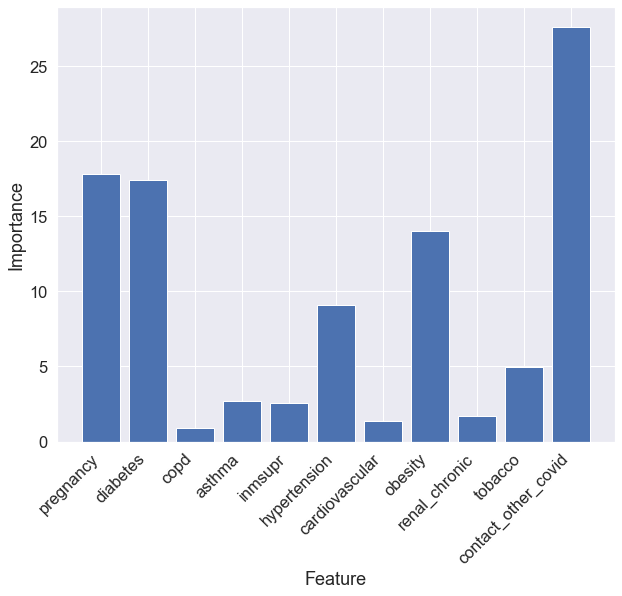

In [65]:
#Catboost Feature Importance Scores
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
empty=[]
X = data.loc[:,data.columns !='covid_res']
y = data['covid_res']
model = CatBoostClassifier(verbose=0, n_estimators=7)
n_scores = cross_val_score(model, X, y, scoring='accuracy', n_jobs=-1, error_score='raise')
empty.append(mean(n_scores))
model = CatBoostClassifier(verbose=0, n_estimators=10)
model.fit(X, y)
names = range(4,11)
values = empty
importance = model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
import matplotlib.pyplot as plt
C = [ 'pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'cardiovascular', 'obesity', 'renal_chronic', 'tobacco',
       'contact_other_covid']
GC = importance
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.bar(C, GC)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()

In [51]:
data.columns

Index(['pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'cardiovascular', 'obesity', 'renal_chronic', 'tobacco',
       'contact_other_covid', 'covid_res'],
      dtype='object')

In [84]:
data=df2.drop(['age', 'patient_type', 'sex', 'other_disease', 'icu','intubed', 'pneumonia'], axis=1)

In [85]:
data.columns

Index(['pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'cardiovascular', 'obesity', 'renal_chronic', 'tobacco',
       'contact_other_covid', 'covid_res'],
      dtype='object')

[06:22:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature: 0, Score: 0.12756
Feature: 1, Score: 0.22684
Feature: 2, Score: 0.01647
Feature: 3, Score: 0.03622
Feature: 4, Score: 0.03115
Feature: 5, Score: 0.06748
Feature: 6, Score: 0.01901
Feature: 7, Score: 0.12259
Feature: 8, Score: 0.02521
Feature: 9, Score: 0.04868
Feature: 10, Score: 0.27879


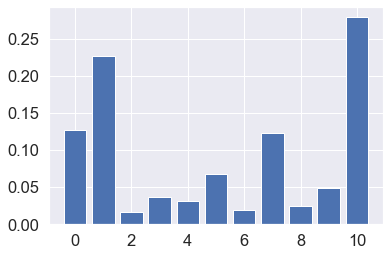

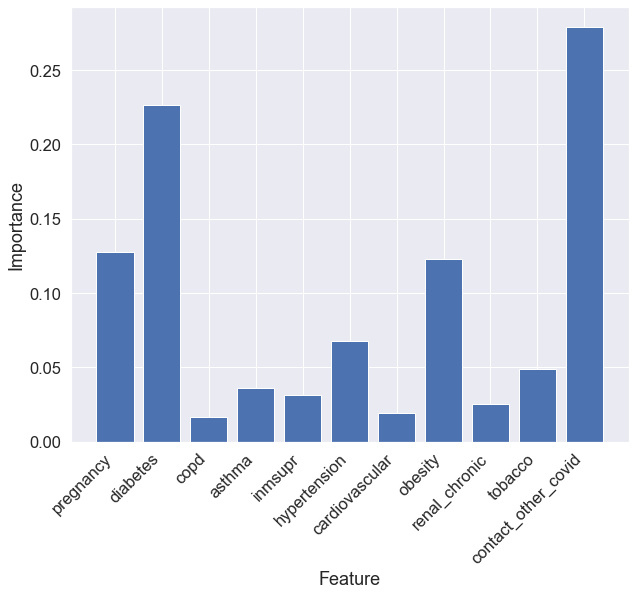

In [81]:
#XGboost Feature Importance Scores
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
X = data.loc[:,data.columns !='covid_res']
y = data['covid_res']
model = XGBClassifier()
empty=[]
n_scores = cross_val_score(model, X, y, scoring='accuracy', n_jobs=-1, error_score='raise')
# fit the model on the whole dataset
empty.append(mean(n_scores))
model = XGBClassifier()
model.fit(X, y)
names = range(2,20)
values = empty
importance = model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
import matplotlib.pyplot as plt
C = ['pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'cardiovascular', 'obesity', 'renal_chronic', 'tobacco',
       'contact_other_covid']
GC = importance
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.bar(C, GC)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()


Feature: 0, Score: 1634.00000
Feature: 1, Score: 1540.00000
Feature: 2, Score: 916.00000
Feature: 3, Score: 861.00000
Feature: 4, Score: 895.00000
Feature: 5, Score: 1535.00000
Feature: 6, Score: 830.00000
Feature: 7, Score: 1501.00000
Feature: 8, Score: 858.00000
Feature: 9, Score: 1260.00000
Feature: 10, Score: 2170.00000


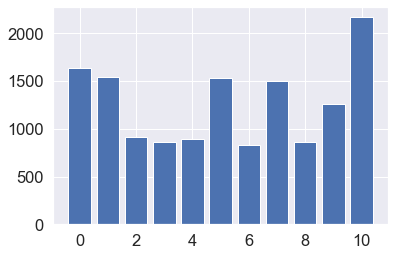

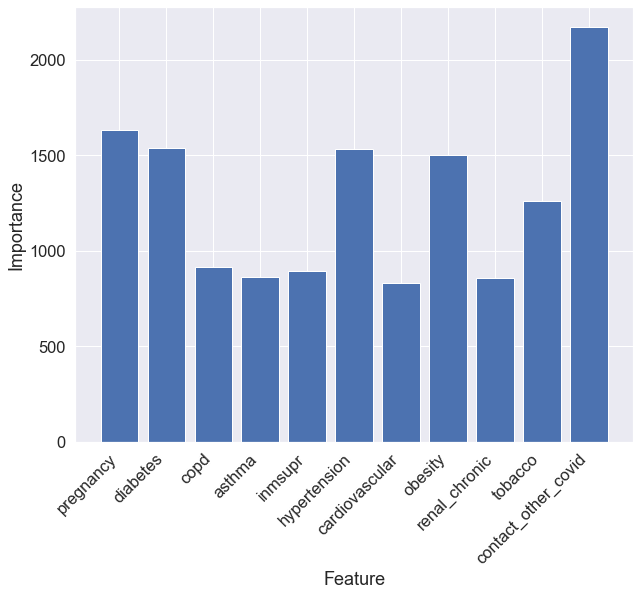

In [84]:
#LightGBM Feature Importance Scores
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
model = LGBMClassifier(n_estimators=2000, max_depth=10, num_leaves=8)
Light = model.fit(X_tr, y_tr)
Light.predict(X_test)
importance = Light.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
import matplotlib.pyplot as plt
   
C = ['pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'cardiovascular', 'obesity', 'renal_chronic', 'tobacco',
       'contact_other_covid']
GC = importance
# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
plt.xticks(rotation=45, ha='right')
plt.grid(True)

plt.bar(C, GC)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()